In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

data to download

In [2]:
file4 = 'https://raw.githubusercontent.com/dbecher84/IS362_final_project/master/GlobalTemperatures.csv'

Create dataframe

In [3]:
global_temp = pd.read_csv(file4, delimiter = ',', sep = 'delimiter', engine = 'python')

give better names to columns and change date column to date

In [4]:
global_temp.columns = ['Date', 'Land Avg Temp', 'Land Avg Temp Uncertainty', 'Land Max Temp', 'Land Max Uncertainty', 'Land Min Temp', 'Land Min Temp Uncertainty', 'Land and Ocean Avg Temp', 'Land and Ocean Avg Temp Uncertainty']
global_temp['Date'] = pd.to_datetime(global_temp['Date'])

slecect data desired from the data frame to create a smaller dataframe that is easier to handle

In [5]:
mask2 = (global_temp['Date'] >= '1980-01-01') & (global_temp['Date'] <= '1990-12-01')
mask4 = (global_temp['Date'] >= '1990-01-01') & (global_temp['Date'] <= '2000-12-01')
mask6 = (global_temp['Date'] >= '2000-01-01') & (global_temp['Date'] <= '2010-12-01')

mask = (global_temp['Date'] >= '1980-01-01') & (global_temp['Date'] <= '2010-12-01')

global_temp_80_10 = global_temp.loc[mask]

global_temp_80_10.head()

,Date,Land Avg Temp,Land Avg Temp Uncertainty,Land Max Temp,Land Max Uncertainty,Land Min Temp,Land Min Temp Uncertainty,Land and Ocean Avg Temp,Land and Ocean Avg Temp Uncertainty
2760,1980-01-01,2.956,0.087,8.468,0.080,-2.457,0.124,13.812,0.049
2761,1980-02-01,3.652,0.099,9.260,0.129,-1.864,0.115,14.112,0.050
2762,1980-03-01,5.367,0.103,11.240,0.160,-0.379,0.126,14.646,0.052
2763,1980-04-01,8.935,0.106,14.821,0.129,3.109,0.175,15.578,0.052
2764,1980-05-01,11.770,0.089,17.713,0.234,6.131,0.172,16.314,0.050


create month oject with data from dataframe for use in plotting

In [6]:
month_list = [0, 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov','dec']

for x in range(1,13):
    month = global_temp_80_10.loc[(global_temp_80_10['Date'].dt.month==x)]
    month_list[x] = month       

scatter plots showing the average global temperatures for each month from 1980-2010. This graph show that the average temperature have increased for each month over this time period.

Text(0.5,1.02,'Max Temp change from 1980-2010')

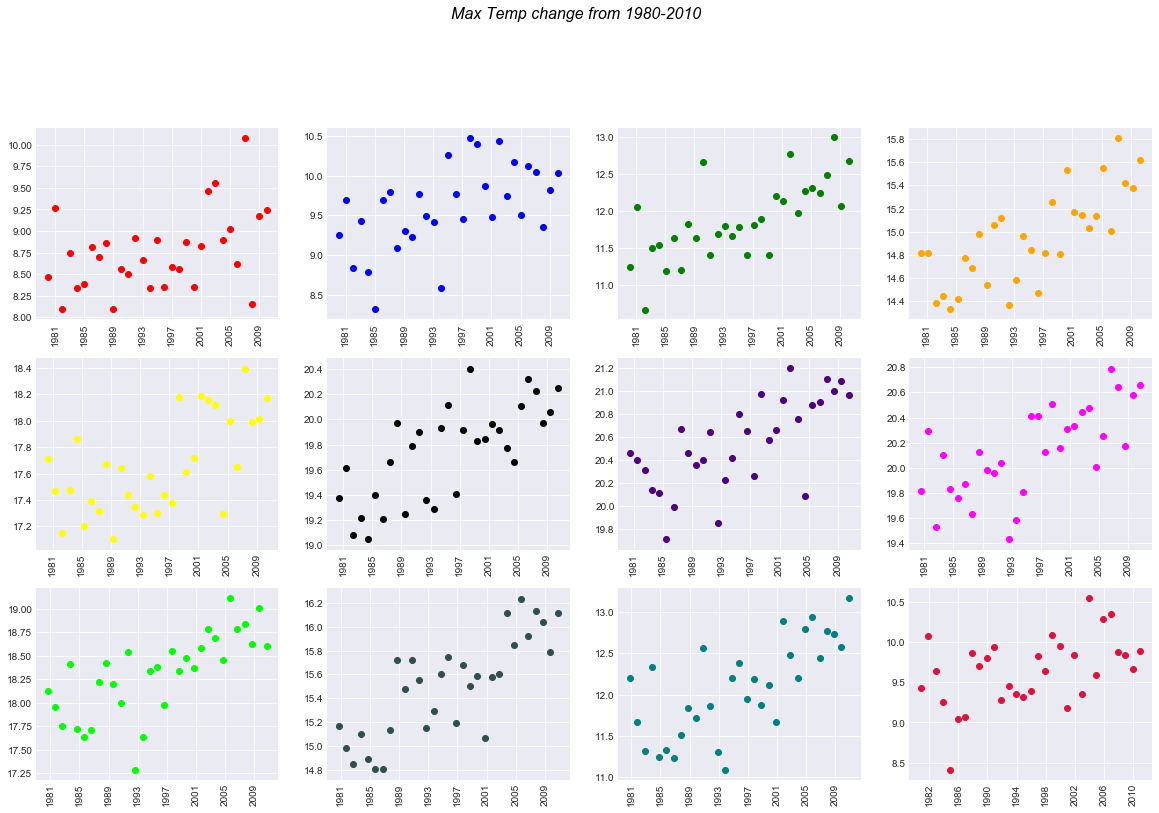

In [7]:
from matplotlib import colors as mcolors

fig = plt.figure()
fig.set_size_inches(20, 12)
#ax=fig.add_subplot(111)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

color_list = [0, 'red', 'blue', 'green', 'orange', 'yellow', 'black', 'indigo', 'magenta', 'lime', 'darkslategray', 'teal', 'crimson']
num=0
for m in range(1,13):
    num += 1
    plt.subplot(3,4,num)
    plt.scatter(month_list[m]['Date'].tolist(), month_list[m]['Land Max Temp'], color=color_list[m])
    plt.setp(plt.xticks()[1], rotation=90)
#months[1].plot(kind= 'bar', color= 'red', ax=ax, width= .2, x='Date', y='Land Max Temp', label='Jan', align='edge')
#months[2].plot(kind= 'bar', color= 'blue', ax=ax, width= -.2, x='Date', y='Land Max Temp', label='Feb', align='edge')

plt.suptitle("Max Temp change from 1980-2010", fontsize=16, fontweight=0, color='black', style='italic', y=1.02)



create dataframe to house the pct change information for each month

In [8]:
max_change = pd.DataFrame()

year =[]
for y in range(1980, 2011):
    year.append(y)
max_change['Year'] = year
max_change.set_index('Year', inplace=True)

populate the previously created dataframe

In [9]:
for i in range(1,13):
    working = global_temp_80_10[global_temp_80_10['Date'].dt.month==i]
    working.set_index(max_change.index, inplace=True)
    working_change = working['Land Max Temp'].pct_change()
    max_change[i] = working_change

max_change.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,0.094355,0.046328,0.072064,-0.000270,-0.013662,0.012181,-0.003323,0.024175,-0.009437,-0.012591,-0.043211,0.067543
1982,-0.127010,-0.087316,-0.114772,-0.028953,-0.018431,-0.026924,-0.004265,-0.037402,-0.011142,-0.008946,-0.030422,-0.042809
1983,0.081211,0.066041,0.078373,0.004309,0.019126,0.007022,-0.008468,0.029231,0.037296,0.016975,0.090154,-0.040158
1984,-0.046759,-0.067996,0.003303,-0.007958,0.021915,-0.008690,-0.001490,-0.013678,-0.037693,-0.013645,-0.088455,-0.090703


The spring and summer time months appear to have an lower average rate of change in temperature than the winter months. 
The winter months appear to be warming faster than the summer months.

In [10]:
max_change.mean()

1     0.005685
2     0.005162
3     0.005269
4     0.002061
5     0.001127
6     0.001653
7     0.000976
8     0.001540
9     0.001152
10    0.002222
11    0.003620
12    0.002984
dtype: float64

There does not appear to be a distinctive trend in the rate of change for each month. For most months the rate of change is more positive than negative, but there does not appear to be an overall trend for the rate of change. It flucutates from year to year.

Text(0.5,1.02,'Average Max Temp Rate of Change for Months 1980-2010')

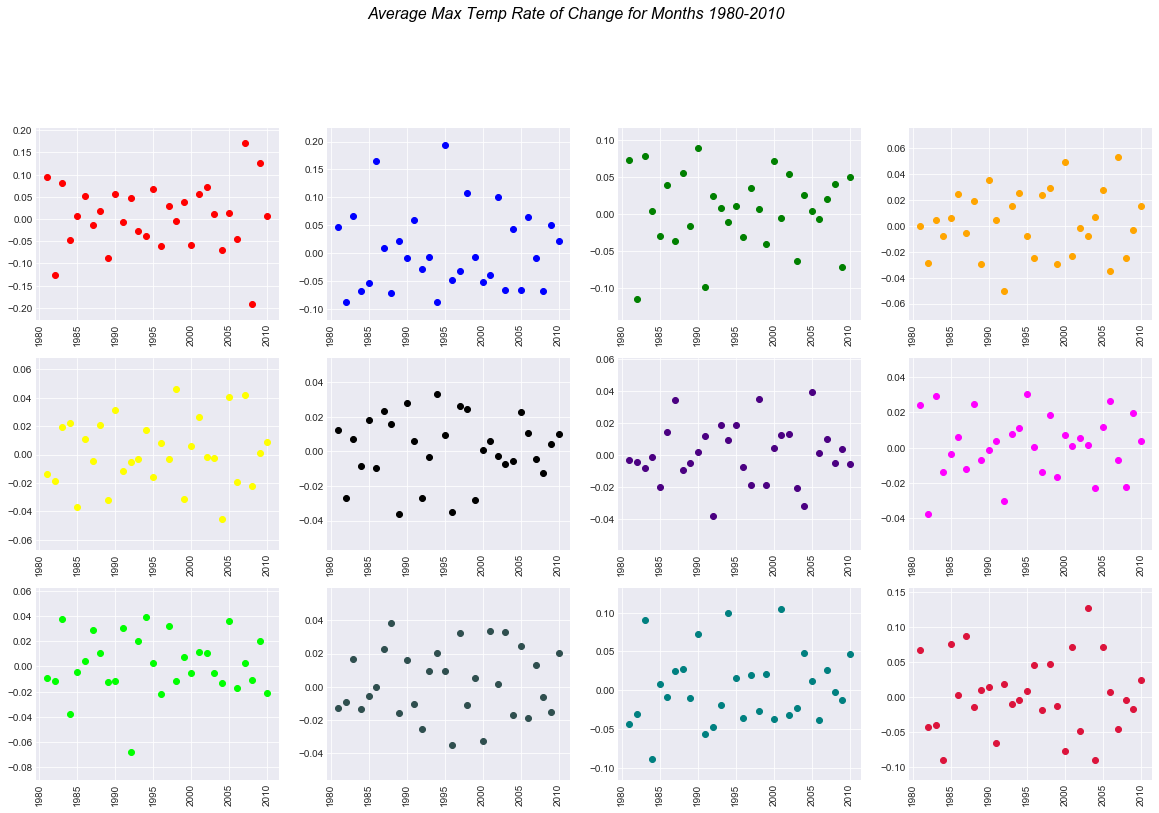

In [13]:
fig = plt.figure()
fig.set_size_inches(20, 12)
#ax=fig.add_subplot(111)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

color_list = [0, 'red', 'blue', 'green', 'orange', 'yellow', 'black', 'indigo', 'magenta', 'lime', 'darkslategray', 'teal', 'crimson']
num=0
for z in range(1,13):
    num += 1
    plt.subplot(3,4,num)
    plt.scatter(y=max_change[z], x=max_change.index, color=color_list[z])
    plt.setp(plt.xticks()[1], rotation=90)

plt.suptitle("Average Max Temp Rate of Change for Months 1980-2010", fontsize=16, fontweight=0, color='black', style='italic', y=1.02)

Land minimum analysis

The land minimum temperatures like the maximum temperatures have also been increasing from 1980-2010 as shown in the graphs below. 

Text(0.5,1.02,'Min Temp change from 1980-2010')

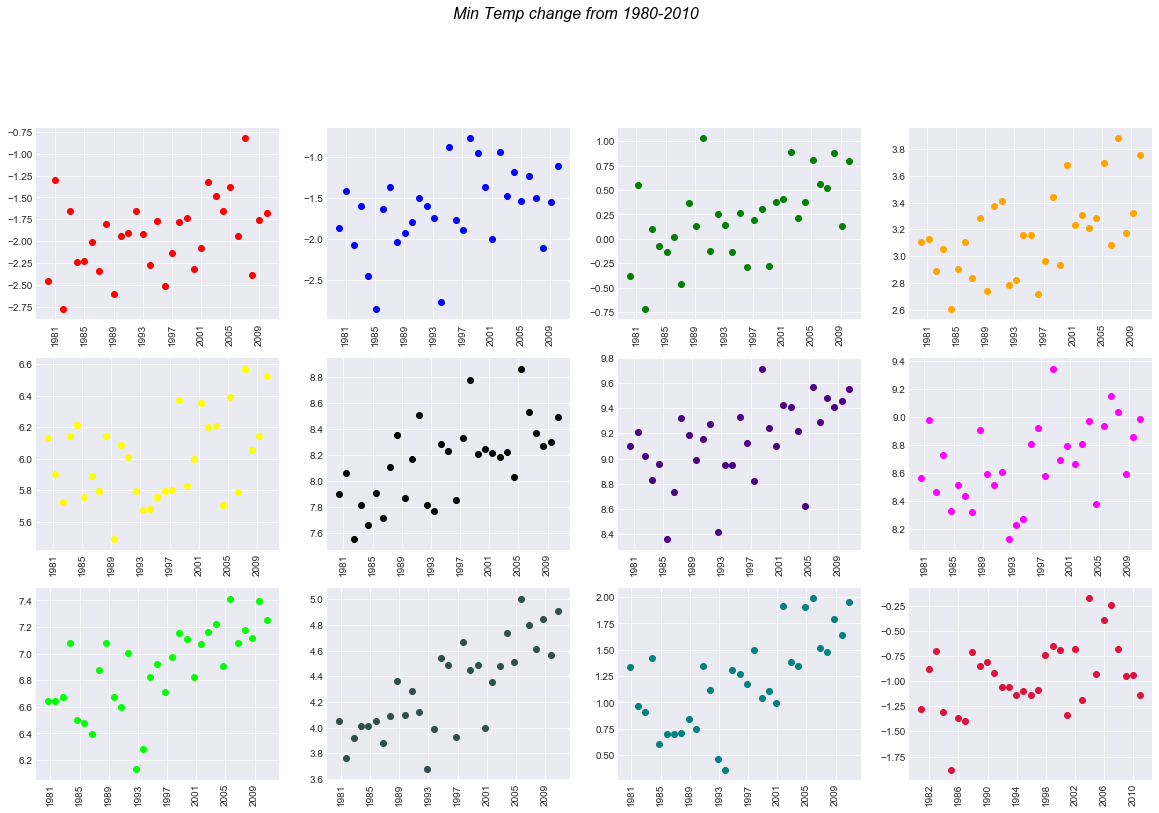

In [14]:
fig = plt.figure()
fig.set_size_inches(20, 12)
#ax=fig.add_subplot(111)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

color_list = [0, 'red', 'blue', 'green', 'orange', 'yellow', 'black', 'indigo', 'magenta', 'lime', 'darkslategray', 'teal', 'crimson']
num=0
for m in range(1,13):
    num += 1
    plt.subplot(3,4,num)
    plt.scatter(month_list[m]['Date'].tolist(), month_list[m]['Land Min Temp'], color=color_list[m])
    plt.setp(plt.xticks()[1], rotation=90)
#months[1].plot(kind= 'bar', color= 'red', ax=ax, width= .2, x='Date', y='Land Max Temp', label='Jan', align='edge')
#months[2].plot(kind= 'bar', color= 'blue', ax=ax, width= -.2, x='Date', y='Land Max Temp', label='Feb', align='edge')

plt.suptitle("Min Temp change from 1980-2010", fontsize=16, fontweight=0, color='black', style='italic', y=1.02)

In [15]:
min_change = pd.DataFrame()

year =[]
for y in range(1980, 2011):
    year.append(y)
min_change['Year'] = year
min_change.set_index('Year', inplace=True)

In [19]:
for i in range(1,13):
    working = global_temp_80_10[global_temp_80_10['Date'].dt.month==i]
    working.set_index(min_change.index, inplace=True)
    #print (working)
    working_change = working['Land Min Temp'].pct_change()
    min_change[i] = working_change

min_change.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,-0.471713,-0.243562,-2.461741,0.007076,-0.037514,0.020757,0.011646,0.048348,0.000602,-0.070600,-0.272864,-0.312451
1982,1.139445,0.471631,-2.303249,-0.076972,-0.029487,-0.063112,-0.020526,-0.057035,0.004364,0.040372,-0.062887,-0.197039
1983,-0.405834,-0.232771,-1.134349,0.056401,0.072813,0.034807,-0.021067,0.031187,0.060674,0.023998,0.563256,0.860993
1984,0.354545,0.540201,-1.804124,-0.145758,0.010905,-0.020079,0.014611,-0.045710,-0.081921,0.000997,-0.576355,0.432927


The summer time low temps also seem to have a lower average rate of change compaired to the winter months.

In [20]:
min_change.mean()

1     0.068921
2     0.066550
3    -1.525675
4     0.015027
5     0.004081
6     0.003310
7     0.002614
8     0.002454
9     0.004037
10    0.009113
11    0.110153
12    0.203626
dtype: float64

Like the land maximum temps the minumum temp average rate of change does not appear to have a general trend. They are still mostly positive like the maximums. 

Text(0.5,1.02,'Average Temp Min Rate of Change for Months 1980-2010')

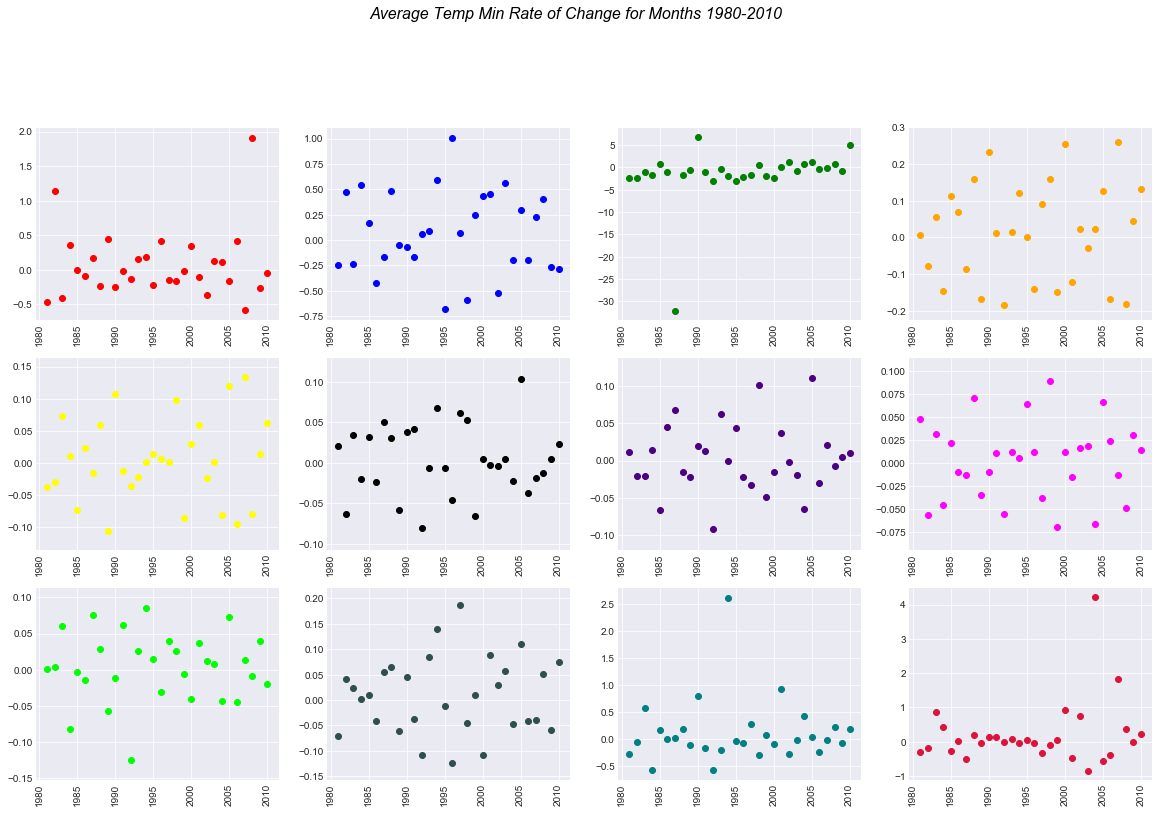

In [21]:
fig = plt.figure()
fig.set_size_inches(20, 12)
#ax=fig.add_subplot(111)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

color_list = [0, 'red', 'blue', 'green', 'orange', 'yellow', 'black', 'indigo', 'magenta', 'lime', 'darkslategray', 'teal', 'crimson']
num=0
for z in range(1,13):
    num += 1
    plt.subplot(3,4,num)
    plt.scatter(y=min_change[z], x=min_change.index, color=color_list[z])
    plt.setp(plt.xticks()[1], rotation=90)

plt.suptitle("Average Temp Min Rate of Change for Months 1980-2010", fontsize=16, fontweight=0, color='black', style='italic', y=1.02)

In general it would appear that the winter time temperatures are changing faster than the summer months. Both the max and min temps had a higher rate of change for the winter months. While the rate of change varies from year to year it have been moving in a postitive direction overall. 